In [1]:
#imported all the necessary Libraries
import pandas as pd
import numpy as np
#import math
import csv
import os
#import pathlib
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.preprocessing import image
from keras.models import load_model
from tensorflow.keras.layers import Dropout
import seaborn as sea
import matplotlib.pyplot as plot

Using TensorFlow backend.


# Data Preparation

In [64]:
#open the csv file and split the strings all the rows
for i in range(1,7):
    with open("E:\\Transfer_Learning\\Data\\combined.csv") as infile:
        read = csv.reader(infile) # Create a new reader
        next(read) # Skip the first row
        if i==1:
            image_id = [row[0].split("_")[1] for row in read]
        if i==2:
            gender = [row[0].split("_")[2] for row in read]
        if i==3:
            glasses = [row[0].split("_")[3] for row in read]
        if i==4:
            eye_state = [row[0].split("_")[4] for row in read]
        if i==5:
            reflections = [row[0].split("_")[5] for row in read]
        if i==6:
            image_quality = [row[0].split("_")[6] for row in read]

In [65]:
#append all the above lists to dataframe
df = pd.DataFrame(list(zip(image_id, gender, glasses, eye_state, reflections, image_quality)), 
               columns =['image_id', 'gender', 'glasses', 'eye_state', 'reflections', 'image_quality'])

In [66]:
#convert the dataframe to csv
df.to_csv('E:\\Transfer_Learning\\Data\\list.csv.csv', mode='a', header=True)

In [ ]:
#Reshaping the images
def preProcessing1(df, colName):
    image_1 = []
    for i in tqdm(range(df.shape[0])):
        img = image.load_img(df[colName][i:i+1].values[0], target_size=(24,24,3), color_mode="grayscale")
        img = image.img_to_array(img)
        img = img/255

        image_1.append(img)

    X = np.array(image_1)
    return X

# EDA (Data Distribution)

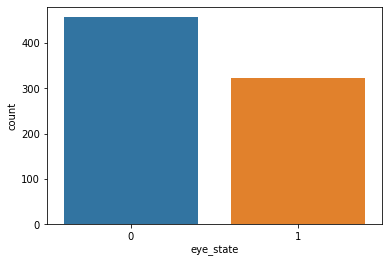

In [103]:
import seaborn as sns

ax = sns.countplot(x="eye_state",data=df)

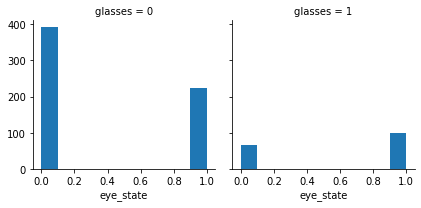

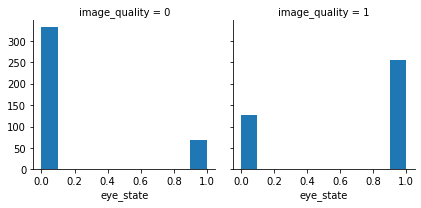

In [112]:
a=sea.FacetGrid(df, col = "glasses").map(plot.hist, "eye_state")
b=sea.FacetGrid(df, col = "image_quality").map(plot.hist, "eye_state")
plot.show(a)
plot.show(b)

# Model Training

In [97]:
df = pd.read_csv("E:/Transfer_Learning/Data/Combined.csv")
os.chdir('E:/Transfer_Learning/Data/Images')
X_ = preProcessing1(df, 'image_name')
y = df[["Drowsy", "Not_Drowsy"]]

100%|██████████| 781/781 [00:04<00:00, 194.50it/s]


In [99]:
tranfer_learning_pre_built = load_model("E:/Transfer_Learning/Data/Model/Drowsiness detection/models/cnnCat2.h5")

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.20, random_state=12)
tranfer_learning_pre_built.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test) )

trainAccuracy  = tranfer_learning_pre_built.history.history['accuracy'][-1]
valAccuracy = tranfer_learning_pre_built.history.history['val_accuracy'][-1]

tranfer_learning_pre_built.save("E:/Transfer_Learning/Data/Model/Drowsiness detection/models/Retrained_sleepy_non_sleepy_64_10.h5")

newList.append((trainAccuracy, valAccuracy))
new_df = pd.DataFrame(newList, columns = [ 'TrainAcc', 'ValAcc'])
new_df.to_csv("E:/Transfer_Learning/Data/Model/Drowsiness detection/models/Accuracies_sleep.csv", header = False, mode = 'a')
print('Modelling completed')

Train on 624 samples, validate on 157 samples
Epoch 1/10
624/624 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.7436 - val_loss: 0.3981 - val_accuracy: 0.8280
Epoch 2/10
624/624 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8077 - val_loss: 0.3221 - val_accuracy: 0.8344
Epoch 3/10
624/624 [==============================] - 1s 2ms/step - loss: 0.2910 - accuracy: 0.8702 - val_loss: 0.2587 - val_accuracy: 0.9236
Epoch 4/10
624/624 [==============================] - 1s 2ms/step - loss: 0.2282 - accuracy: 0.9038 - val_loss: 0.2135 - val_accuracy: 0.9172
Epoch 5/10
624/624 [==============================] - 1s 2ms/step - loss: 0.1967 - accuracy: 0.9263 - val_loss: 0.2172 - val_accuracy: 0.9045
Epoch 6/10
624/624 [==============================] - 1s 2ms/step - loss: 0.1669 - accuracy: 0.9407 - val_loss: 0.2092 - val_accuracy: 0.9172
Epoch 7/10
624/624 [==============================] - 1s 2ms/step - loss: 0.1495 - accuracy: 0.9375 - 

# Model accuarcy and loss plots

In [113]:
acc_loss_df = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['epochs'])
acc_loss_df['Pretrained_model_loss'] = tranfer_learning_pre_built.history.history['loss']
acc_loss_df['Pretrained_model.h5_val_loss'] = tranfer_learning_pre_built.history.history['val_loss']
acc_loss_df['Pretrained_model.h5_acc'] = tranfer_learning_pre_built.history.history['accuracy']
acc_loss_df['Pretrained_model.h5_valAcc'] = tranfer_learning_pre_built.history.history['val_accuracy']
acc_loss_df.head()

,epochs,Pretrained_model_loss,Pretrained_model.h5_val_loss,Pretrained_model.h5_acc,Pretrained_model.h5_valAcc
0,1,0.694419,0.398052,0.743590,0.828025
1,2,0.410321,0.322124,0.807692,0.834395
2,3,0.291010,0.258671,0.870192,0.923567
3,4,0.228199,0.213464,0.903846,0.917197
4,5,0.196677,0.217178,0.926282,0.904459


In [116]:
acc_loss_df.columns
loss_odf = acc_loss_df[['epochs', 'Pretrained_model_loss']]
loss_odf.columns = ['Epoch', 'Transfer learning model']
loss_vodf = acc_loss_df[['epochs', 'Pretrained_model.h5_val_loss']]
loss_vodf.columns = ['Epoch', 'Transfer learning model']

acc_odf = acc_loss_df[['epochs', 'Pretrained_model.h5_acc']]
acc_odf.columns = ['Epoch', 'Transfer learning model']
acc_vodf = acc_loss_df[['epochs', 'Pretrained_model.h5_valAcc']]
acc_vodf.columns = ['Epoch', 'Transfer learning model']
acc_vodf.head()

,Epoch,Transfer learning model
0,1,0.828025
1,2,0.834395
2,3,0.923567
3,4,0.917197
4,5,0.904459


Text(0.5, 1.0, 'validation Accuracy Plot')

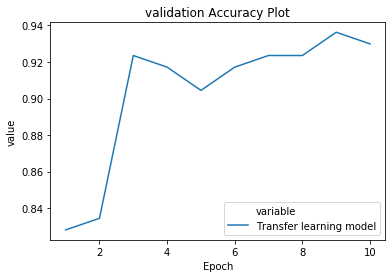

In [117]:
sea.lineplot(x='Epoch', y='value', hue='variable',data=pd.melt(acc_vodf, ['Epoch'])).set_title('validation Accuracy Plot')

Text(0.5, 1.0, 'Validation Loss Plot')

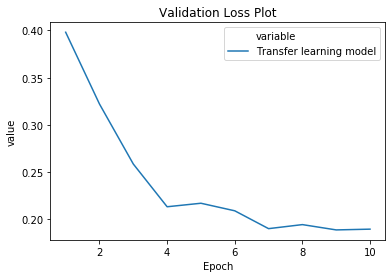

In [119]:
sea.lineplot(x='Epoch', y='value', hue='variable',data=pd.melt(loss_vodf, ['Epoch'])).set_title('Validation Loss Plot')